## Polynomial Regression Task 2: Ice Cream Sales Prediction

### Step 1: Import Libraries and Load Data

In [155]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')


In [156]:
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\03-polynomial-regression\Ice_cream_selling_data.csv")
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


### Step 2: EDA + Preprocessing + Train test split

In [157]:
df.shape, df.isna().sum()

((49, 2),
 Temperature (°C)           0
 Ice Cream Sales (units)    0
 dtype: int64)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

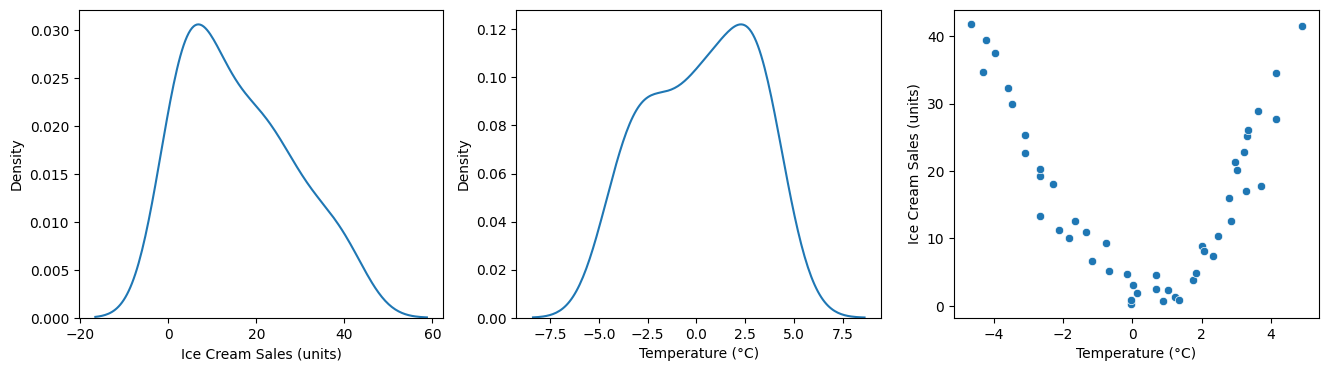

In [159]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))


sns.kdeplot(data=df, x='Ice Cream Sales (units)', ax=ax1)
sns.kdeplot(data=df, x="Temperature (°C)", ax=ax2)
sns.scatterplot(data=df, x='Temperature (°C)', y='Ice Cream Sales (units)', ax=ax3)


In [160]:
X=df[['Temperature (°C)']]
y= df['Ice Cream Sales (units)']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Train the Model

In [162]:
reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

### Step 4: Predict and Evaluate

In [163]:
y_pred = reg.predict(X_test)

In [164]:
print(r2_score(y_test, y_pred))

-0.5751270190188227


Text(0, 0.5, 'Ice Cream Sales')

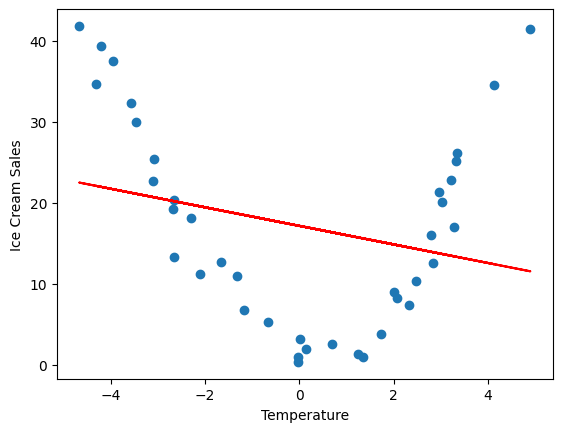

In [165]:
plt.plot(X_train, reg.predict(X_train), color="red") # Pattern learned by model: Red Line
plt.scatter(X_train, y_train)   # Scatter plot of training data
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")

### Repeat Step 3: Apply Polynomial Feature and Train the model

In [166]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [167]:
poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)

LinearRegression()

### Repeat Step 4: Predict and Evaluate for Polynomial Features

In [168]:
y_pred = poly_reg.predict(X_test_poly)

print(r2_score(y_test, y_pred))

0.843055137193884


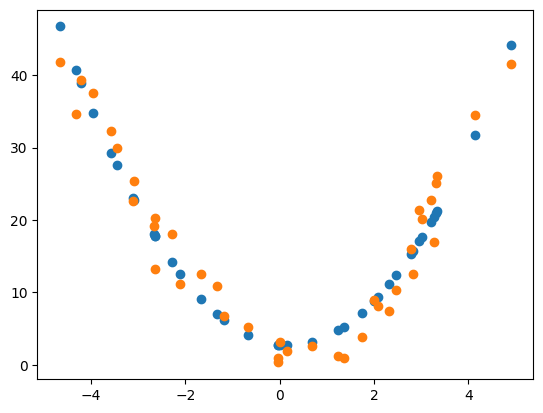

In [169]:
# plt.plot(X_train, poly_reg.predict(X_train_poly), color="red")
# sns.scatterplot(x=X_train, y=poly_reg.predict(X_train_poly))

# The non-linear pattern learned by the model: Blue
plt.scatter(X_train, poly_reg.predict(X_train_poly))

# Scatter plot of training data: Orange
plt.scatter(X_train, y_train)

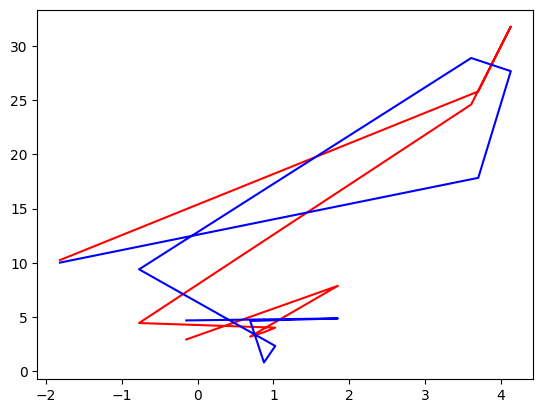

In [170]:
plt.plot(X_test, y_pred, color="red")   # Predicted: red
plt.plot(X_test, y_test, color="blue")  # Actual: Blue

In [171]:
print(r2_score(y_test, y_pred))

0.843055137193884


### Step 5: Y_intercept and Slope

In [172]:
# Get the model's intercept and coefficients
intercept = poly_reg.intercept_
coefficients = poly_reg.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: 2.7683058295738583
Coefficients: [ 0.         -0.70641926  1.87145125]


In [173]:
new_temperature = np.array([[-4.662263]])  # New temperature value
# -4.662263	41.842986

# Transform the new temperature value into polynomial features
new_temperature_poly = poly.transform(new_temperature)

# Predict the ice cream sales for this new temperature value
predicted_sales = poly_reg.predict(new_temperature_poly)

print(f"Predicted ice cream sales for {new_temperature}°C: {predicted_sales[0]}")


Predicted ice cream sales for [[-4.662263]]°C: 46.740985611507824


### Summarized Code

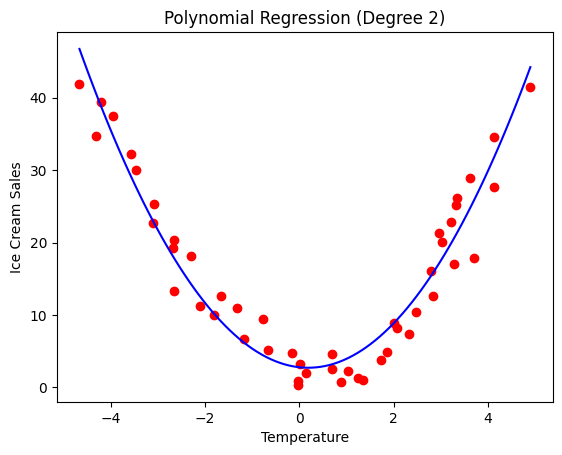

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your ice cream dataset (replace this with your actual dataset)
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\03-polynomial-regression\Ice_cream_selling_data.csv")
X = df[['Temperature (°C)']].values  # Independent variable (e.g., Temperature)
y = df['Ice Cream Sales (units)'].values          # Dependent variable (e.g., Ice Cream Sales)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to the original data before polynomial transformation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial feature transformation (degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the Polynomial Regression model
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Predict for a smooth range of X values (for a smooth curve)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
x_range_poly = poly.transform(x_range_scaled)
y_pred = reg.predict(x_range_poly)

# Plot the data points and the smooth polynomial regression curve
plt.scatter(X, y, color='red')  # Actual data points
plt.plot(x_range, y_pred, color='blue')  # Polynomial regression curve
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")
plt.show()
